In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import PIL.Image
import cv2
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
DATADIR = "/content/drive/MyDrive/Colab Notebooks/BirdVsDrone"

categorias = ["Birds", "Drones"]

batch_size = 10
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  DATADIR,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  DATADIR,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 826 files belonging to 2 classes.
Using 661 files for training.
Found 826 files belonging to 2 classes.
Using 165 files for validation.


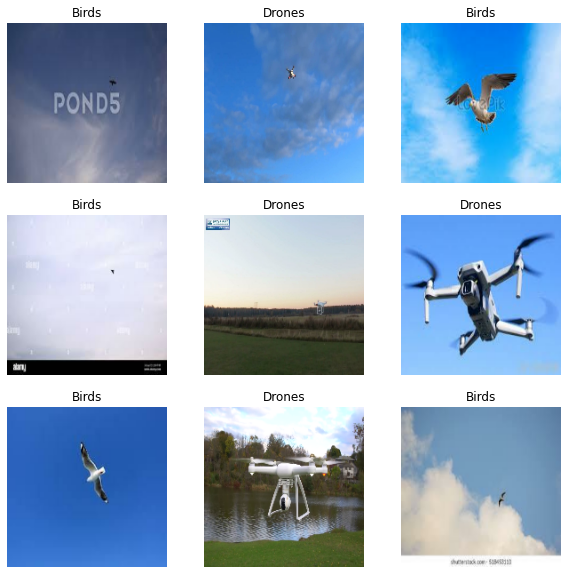

In [3]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(categorias[labels[i]])
    plt.axis("off")

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [5]:
modelo = Sequential()

modelo.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3))),
modelo.add(Conv2D(32, (3, 3)))
modelo.add(Activation('relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))
modelo.add(Conv2D(64, (3, 3)))
modelo.add(Activation('relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))

modelo.add(Flatten())
modelo.add(Dense(64))

modelo.add(Dense(1))
modelo.add(Activation('sigmoid'))

modelo.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 activation (Activation)     (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 87, 87, 64)        0         
                                                        

In [6]:
history = modelo.fit(train_ds, validation_data=val_ds, epochs=5)

Epoch 1/5
67/67 [==============================] - 60s 883ms/step - loss: 2.0939 - accuracy: 0.6233 - val_loss: 0.4754 - val_accuracy: 0.8000
Epoch 2/5
67/67 [==============================] - 38s 559ms/step - loss: 0.4473 - accuracy: 0.7852 - val_loss: 0.6202 - val_accuracy: 0.7030
Epoch 3/5
67/67 [==============================] - 40s 575ms/step - loss: 0.3831 - accuracy: 0.8381 - val_loss: 0.3389 - val_accuracy: 0.8667
Epoch 4/5
67/67 [==============================] - 37s 552ms/step - loss: 0.2882 - accuracy: 0.8744 - val_loss: 0.3334 - val_accuracy: 0.8606
Epoch 5/5
67/67 [==============================] - 38s 555ms/step - loss: 0.2687 - accuracy: 0.8926 - val_loss: 0.5625 - val_accuracy: 0.7455


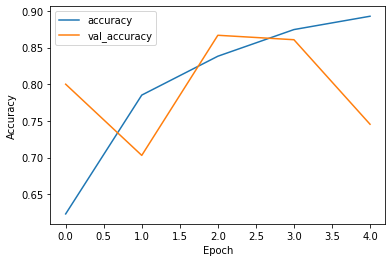

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0, 1])
plt.legend(loc='best')

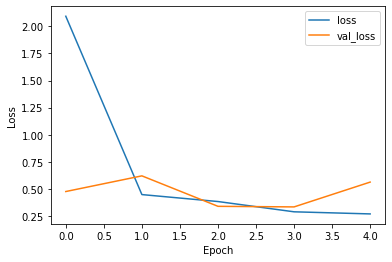

In [8]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')